5394.0


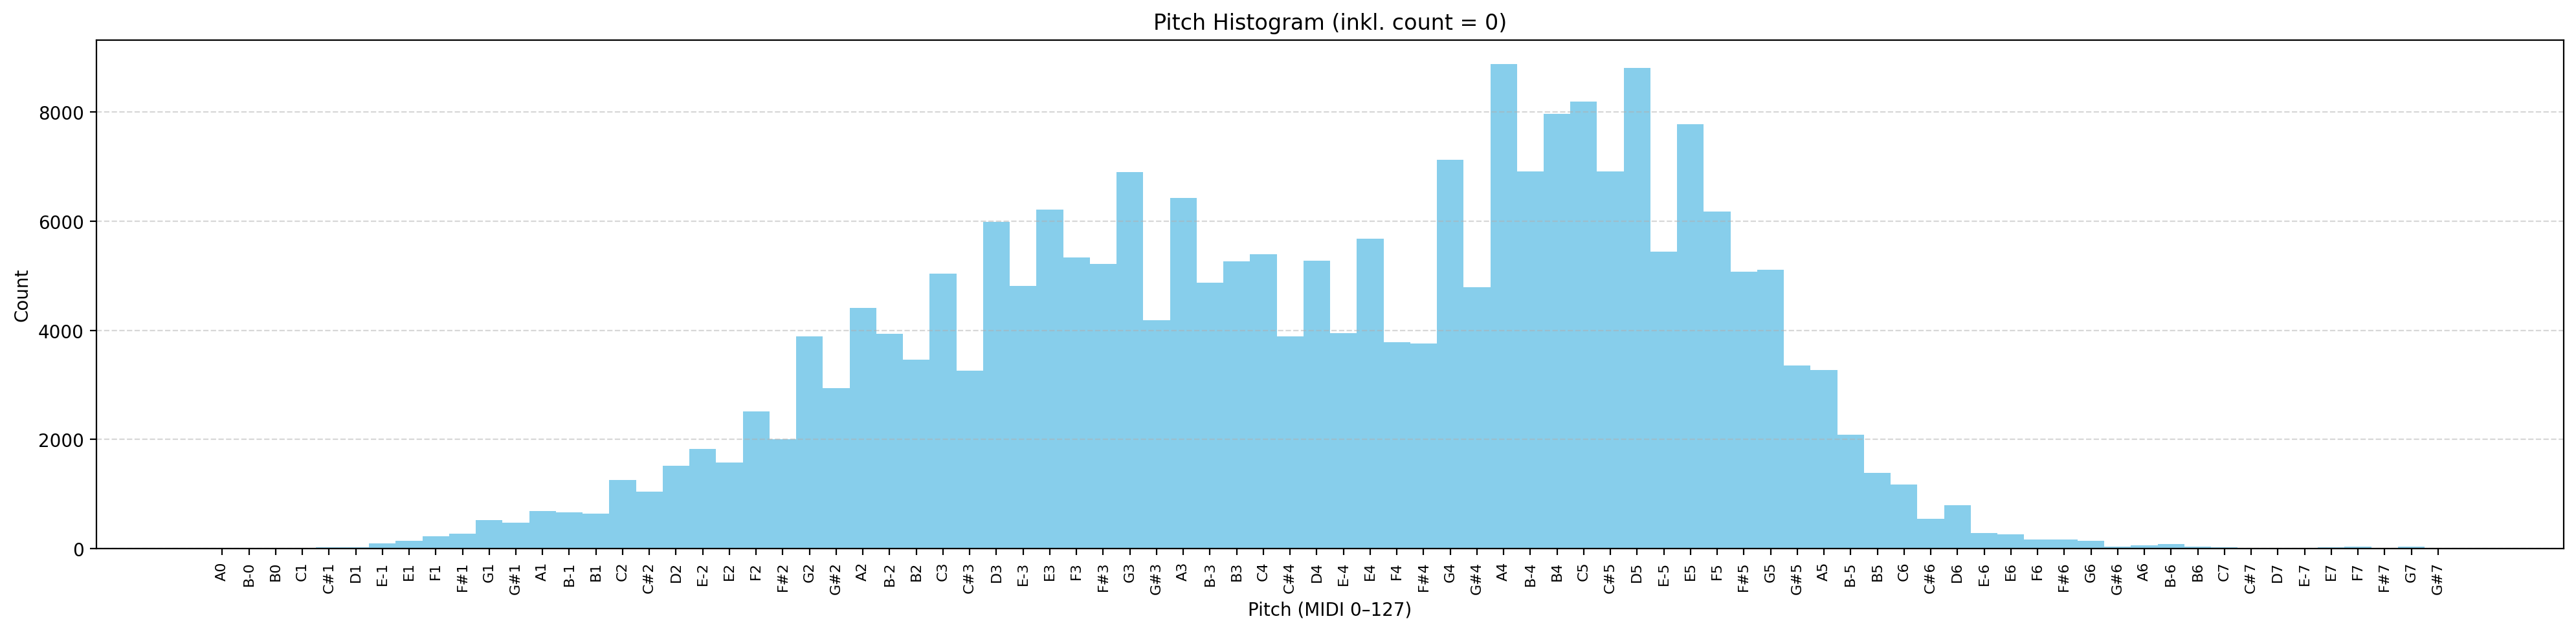

Under range: 0, over_range: 0
Lowest: 0, Highest: 9
Median: 121.5
standardabweichug: 2551.161860769275
largest gap: 1.0 (quarters)


In [13]:
import numpy as np
import music21 as m21
import matplotlib.pyplot as plt
import pathlib
import ipywidgets as widgets
from groove_panda.midi import parser

paths = pathlib.Path('/home/jan/music-generator/data/midi/datasets/src_003').rglob('*.mid')

MIDI_PITCH_SIZE = 128
under_range, over_range = 0, 0
lowest, highest = 127, 0
pitch_counter = np.zeros(MIDI_PITCH_SIZE)
note_counter = 0
max_gap = 0.0

for path in paths:
    score = m21.converter.parseFile(fp=path)
    notes_list = score.recurse().getElementsByClass(m21.note.Note)

    for note in notes_list:
        midi_pitch = note.pitch.midi
        pitch_counter[midi_pitch] += 1
        if midi_pitch < 24: under_range += 1
        if midi_pitch > 105: over_range += 1
        if midi_pitch < lowest: lowest = midi_pitch
        if midi_pitch > highest: highest = midi_pitch
        note_counter += 1

    notes_sorted = sorted(notes_list, key=lambda n: n.offset)
    for i in range(len(notes_sorted) - 1):
        n1 = notes_sorted[i]
        n2 = notes_sorted[i + 1]
        m21.note.Note().offset
        if gap > max_gap:
            max_gap = gap


# Alle MIDI-Pitches (0–127) initialisieren
all_midi = list(range(0, MIDI_PITCH_SIZE))
all_labels = [m21.pitch.Pitch(m).nameWithOctave for m in all_midi]

# Plot
plt.figure(figsize=(20, 5))
plt.bar(all_labels[21:105], pitch_counter[21:105], width=1.0, color='skyblue')

print(pitch_counter[60])

plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Pitch (MIDI 0–127)')
plt.ylabel('Count')
plt.title('Pitch Histogram (inkl. count = 0)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

median = np.quantile(pitch_counter, 0.5)
std_abw = np.std(pitch_counter)

print(f"Under range: {m21.pitch.convertPitchClassToStr(under_range)}, over_range: {m21.pitch.convertPitchClassToStr(over_range)}")
print(f"Lowest: {m21.pitch.convertPitchClassToStr(lowest)}, Highest: {m21.pitch.convertPitchClassToStr(highest)}")
print(f"Median: {median}")
print(f"standardabweichug: {std_abw}")
print(f"largest gap: {max_gap} (quarters)")